##### Task: Obtain the xg shot and other parameters and with help of those draw a correlation graph and find the relavant factors involved in a goal or expected Goal Shots

In [111]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [112]:
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [113]:
client=MongoClient('localhost',27017)
db=client['Wyscout']

In [114]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [115]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [116]:
# For Notebooks
init_notebook_mode(connected=True)

In [117]:
# For offline use
cf.go_offline()
import plotly.express as px

In [45]:
goalVSrest=db.player_advance_stats.aggregate([
{'$unwind': "$total"},
{'$unwind': "$positions"},
{'$project':{ "_id":0,"playerId":1,"competitionId":1,"seasonId":1,"total.matches" : 1,	"total.matchesInStart" : 1,	"total.matchesSubstituted" : 1,	"total.matchesComingOff" : 1,	"total.minutesOnField" : 1,	"total.minutesTagged" : 1,	"total.goals" : 1,	"total.assists" : 1,	"total.shots" : 1,
	"total.headShots" : 1,	"total.yellowCards" : 1,	"total.redCards" : 1,	"total.directRedCards" : 1,	"total.penalties" : 1,	"total.linkupPlays" : 1,	"total.duels" : 1,	"total.duelsWon" : 1,	"total.defensiveDuels" : 1,
	"total.defensiveDuelsWon" : 1,	"total.offensiveDuels" : 1,	"total.offensiveDuelsWon" : 1,	"total.aerialDuels" : 1,	"total.aerialDuelsWon" : 1,	"total.fouls" : 1,	"total.passes" : 1,	"total.successfulPasses" : 1,
	"total.smartPasses" : 1,	"total.successfulSmartPasses" : 1,	"total.passesToFinalThird" : 1,	"total.successfulPassesToFinalThird" : 1,	"total.crosses" : 1,	"total.successfulCrosses" : 1,	"total.forwardPasses" : 1,
	"total.successfulForwardPasses" : 1,	"total.backPasses" : 1,	"total.successfulBackPasses" : 1,	"total.throughPasses" : 1,	"total.successfulThroughPasses" : 1,	"total.keyPasses" : 1,	"total.successfulKeyPasses" : 1,
	"total.verticalPasses" : 1,	"total.successfulVerticalPasses" : 1,	"total.longPasses" : 1,	"total.successfulLongPasses" : 1,	"total.dribbles" : 1,	"total.successfulDribbles" : 1,	"total.interceptions" : 1,	"total.defensiveActions" : 1,
	"total.successfulDefensiveAction" : 1,	"total.attackingActions" : 1,	"total.successfulAttackingActions" : 1,	"total.freeKicks" : 1,	"total.freeKicksOnTarget" : 1,	"total.directFreeKicks" : 1,	"total.directFreeKicksOnTarget" : 1,
	"total.corners" : 1,	"total.successfulPenalties" : 1,	"total.successfulLinkupPlays" : 1,	"total.accelerations" : 1,	"total.pressingDuels" : 1,	"total.pressingDuelsWon" : 1,	"total.looseBallDuels" : 1,	"total.looseBallDuelsWon" : 1,
	"total.missedBalls" : 1,	"total.shotAssists" : 1,	"total.shotOnTargetAssists" : 1,	"total.recoveries" : 1,	"total.opponentHalfRecoveries" : 1,	"total.dangerousOpponentHalfRecoveries" : 1,	"total.losses" : 1,	"total.ownHalfLosses" : 1,
	"total.dangerousOwnHalfLosses" : 1,	"total.xgShot" : 1,	"total.xgAssist" : 1,	"total.xgSave" : 1,	"total.receivedPass" : 1,	"total.touchInBox" : 1,	"total.progressiveRun" : 1,	"total.fieldAerialDuels" : 1,	"total.fieldAerialDuelsWon" : 1,
	"total.gkCleanSheets" : 1,	"total.gkConcededGoals" : 1,	"total.gkShotsAgainst" : 1,	"total.gkExits" : 1,	"total.gkSuccessfulExits" : 1,	"total.gkAerialDuels" : 1,	"total.gkAerialDuelsWon" : 1,	"total.gkSaves" : 1,
	"total.newDuelsWon" : 1,	"total.newDefensiveDuelsWon" : 1,	"total.newOffensiveDuelsWon" : 1,	"total.newSuccessfulDribbles" : 1,	"total.lateralPasses" : 1,	"total.successfulLateralPasses" : 1,"positions.position.code":1}},
{'$match' : { '$or': [{"positions.position.code":"lwf"},{"positions.position.code":"rwf"},{"positions.position.code":"rw"},{"positions.position.code":"lw"},{"positions.position.code":"ss"},{"positions.position.code":"cf"}]}}
])
goalVSrest_df=pd.DataFrame(goalVSrest)
goalVSrest_df

,playerId,competitionId,seasonId,positions,total
0,25413,364,185727,{'position': {'code': 'cf'}},"{'matches': 22, 'matchesInStart': 16, 'matches..."
1,25867,364,185727,{'position': {'code': 'cf'}},"{'matches': 28, 'matchesInStart': 28, 'matches..."
2,247671,364,185727,{'position': {'code': 'rwf'}},"{'matches': 25, 'matchesInStart': 18, 'matches..."
3,247671,364,185727,{'position': {'code': 'cf'}},"{'matches': 25, 'matchesInStart': 18, 'matches..."
4,346158,364,185727,{'position': {'code': 'cf'}},"{'matches': 7, 'matchesInStart': 4, 'matchesSu..."
...,...,...,...,...,...
208,286831,364,185727,{'position': {'code': 'cf'}},"{'matches': 25, 'matchesInStart': 12, 'matches..."
209,302518,364,185727,{'position': {'code': 'rw'}},"{'matches': 21, 'matchesInStart': 12, 'matches..."
210,397060,364,185727,{'position': {'code': 'lw'}},"{'matches': 10, 'matchesInStart': 4, 'matchesS..."
211,397060,364,185727,{'position': {'code': 'rw'}},"{'matches': 10, 'matchesInStart': 4, 'matchesS..."


In [46]:
filter=goalVSrest_df.columns.difference(['positions'])
goalVSrest_df=goalVSrest_df[filter]
goalVSrest_df

,competitionId,playerId,seasonId,total
0,364,25413,185727,"{'matches': 22, 'matchesInStart': 16, 'matches..."
1,364,25867,185727,"{'matches': 28, 'matchesInStart': 28, 'matches..."
2,364,247671,185727,"{'matches': 25, 'matchesInStart': 18, 'matches..."
3,364,247671,185727,"{'matches': 25, 'matchesInStart': 18, 'matches..."
4,364,346158,185727,"{'matches': 7, 'matchesInStart': 4, 'matchesSu..."
...,...,...,...,...
208,364,286831,185727,"{'matches': 25, 'matchesInStart': 12, 'matches..."
209,364,302518,185727,"{'matches': 21, 'matchesInStart': 12, 'matches..."
210,364,397060,185727,"{'matches': 10, 'matchesInStart': 4, 'matchesS..."
211,364,397060,185727,"{'matches': 10, 'matchesInStart': 4, 'matchesS..."


In [47]:
# each col is separated from 'total'
goalVSrest_df = pd.concat([goalVSrest_df.drop(['total'], axis=1), pd.DataFrame(goalVSrest_df['total'].to_list())], axis=1)
goalVSrest_df.head(5)

,competitionId,playerId,seasonId,matches,matchesInStart,matchesSubstituted,matchesComingOff,minutesOnField,minutesTagged,goals,...,gkSuccessfulExits,gkAerialDuels,gkAerialDuelsWon,gkSaves,newDuelsWon,newDefensiveDuelsWon,newOffensiveDuelsWon,newSuccessfulDribbles,lateralPasses,successfulLateralPasses
0,364,25413,185727,22,16,9,6,1527,1527,7,...,0,0,0,0,142,34,59,22,101,76
1,364,25867,185727,28,28,1,0,2688,2688,17,...,0,0,0,0,183,63,83,62,207,131
2,364,247671,185727,25,18,8,7,1813,1813,5,...,0,0,0,0,201,50,107,61,193,153
3,364,247671,185727,25,18,8,7,1813,1813,5,...,0,0,0,0,201,50,107,61,193,153
4,364,346158,185727,7,4,3,3,362,362,1,...,0,0,0,0,22,9,7,3,18,15


In [56]:
pd.set_option('display.max_columns',97)
goalVSrest_df.head(5)

,competitionId,playerId,seasonId,matches,matchesInStart,matchesSubstituted,matchesComingOff,minutesOnField,minutesTagged,goals,assists,shots,headShots,yellowCards,redCards,directRedCards,penalties,linkupPlays,duels,duelsWon,defensiveDuels,defensiveDuelsWon,offensiveDuels,offensiveDuelsWon,aerialDuels,aerialDuelsWon,fouls,passes,successfulPasses,smartPasses,successfulSmartPasses,passesToFinalThird,successfulPassesToFinalThird,crosses,successfulCrosses,forwardPasses,successfulForwardPasses,backPasses,successfulBackPasses,throughPasses,successfulThroughPasses,keyPasses,successfulKeyPasses,verticalPasses,successfulVerticalPasses,longPasses,successfulLongPasses,dribbles,successfulDribbles,interceptions,defensiveActions,successfulDefensiveAction,attackingActions,successfulAttackingActions,freeKicks,freeKicksOnTarget,directFreeKicks,directFreeKicksOnTarget,corners,successfulPenalties,successfulLinkupPlays,accelerations,pressingDuels,pressingDuelsWon,looseBallDuels,looseBallDuelsWon,missedBalls,shotAssists,shotOnTargetAssists,recoveries,opponentHalfRecoveries,dangerousOpponentHalfRecoveries,losses,ownHalfLosses,dangerousOwnHalfLosses,xgShot,xgAssist,xgSave,receivedPass,touchInBox,progressiveRun,fieldAerialDuels,fieldAerialDuelsWon,gkCleanSheets,gkConcededGoals,gkShotsAgainst,gkExits,gkSuccessfulExits,gkAerialDuels,gkAerialDuelsWon,gkSaves,newDuelsWon,newDefensiveDuelsWon,newOffensiveDuelsWon,newSuccessfulDribbles,lateralPasses,successfulLateralPasses
0,364,25413,185727,22,16,9,6,1527,1527,7,4,37,9,6,0,0,0,97,388,137,71,12,184,76,59,14,32,366,277,19,6,34,17,16,6,76,42,90,84,17,4,12,12,101,76,21,6,49,29,29,107,70,121,52,2,1,2,1,0,0,64,11,130,0,74,35,16,19,12,48,20,5,188,51,6,7.72,2.57,0,260,74,14,59,14,0,0,0,0,0,0,0,0,142,34,59,22,101,76
1,364,25867,185727,28,28,1,0,2688,2688,17,0,71,6,3,1,1,1,139,423,150,108,15,174,98,68,16,14,674,485,19,6,42,27,93,32,152,98,172,152,19,10,13,13,207,131,23,15,99,75,64,181,136,282,130,1,1,1,1,0,1,92,36,153,0,73,21,19,17,13,59,31,4,287,74,9,10.94,2.34,0,533,111,50,68,16,0,0,0,0,0,0,0,0,183,63,83,62,207,131
2,364,247671,185727,25,18,8,7,1813,1813,5,5,41,0,3,0,0,1,123,502,210,78,16,320,150,45,13,10,625,511,22,7,42,28,57,21,115,75,185,176,20,4,12,11,193,153,15,9,156,100,28,106,78,276,105,11,3,5,2,61,1,91,35,61,0,59,31,12,30,12,69,43,7,226,62,4,4.11,4.70,0,449,64,71,45,13,0,0,0,0,0,0,0,0,201,50,107,61,193,153
3,364,247671,185727,25,18,8,7,1813,1813,5,5,41,0,3,0,0,1,123,502,210,78,16,320,150,45,13,10,625,511,22,7,42,28,57,21,115,75,185,176,20,4,12,11,193,153,15,9,156,100,28,106,78,276,105,11,3,5,2,61,1,91,35,61,0,59,31,12,30,12,69,43,7,226,62,4,4.11,4.70,0,449,64,71,45,13,0,0,0,0,0,0,0,0,201,50,107,61,193,153
4,364,346158,185727,7,4,3,3,362,362,1,0,9,1,0,0,0,0,24,66,21,16,2,29,13,10,5,6,71,57,1,0,1,1,2,0,5,3,26,23,1,0,1,1,18,15,0,0,8,4,6,22,15,20,6,0,0,0,0,0,0,19,1,53,0,11,1,3,2,1,7,1,1,28,12,1,1.57,0.06,0,68,15,5,10,5,0,0,0,0,0,0,0,0,22,9,7,3,18,15


In [57]:
goalVSrest_df.isnull().values.any()   # There are null values for sure.
goalVSrest_df.isnull().sum().sum()    # There are total 447 null values in this DF considering all the columns

False

0

In [110]:
goalVSrest_df.isna().sum().sum()   # there are no missing values in the df

0

In [58]:
goalVSrest_df=goalVSrest_df.replace(np.nan,0)  # replace 'NaN with 0'
goalVSrest_df.head(3)

,competitionId,playerId,seasonId,matches,matchesInStart,matchesSubstituted,matchesComingOff,minutesOnField,minutesTagged,goals,assists,shots,headShots,yellowCards,redCards,directRedCards,penalties,linkupPlays,duels,duelsWon,defensiveDuels,defensiveDuelsWon,offensiveDuels,offensiveDuelsWon,aerialDuels,aerialDuelsWon,fouls,passes,successfulPasses,smartPasses,successfulSmartPasses,passesToFinalThird,successfulPassesToFinalThird,crosses,successfulCrosses,forwardPasses,successfulForwardPasses,backPasses,successfulBackPasses,throughPasses,successfulThroughPasses,keyPasses,successfulKeyPasses,verticalPasses,successfulVerticalPasses,longPasses,successfulLongPasses,dribbles,successfulDribbles,interceptions,defensiveActions,successfulDefensiveAction,attackingActions,successfulAttackingActions,freeKicks,freeKicksOnTarget,directFreeKicks,directFreeKicksOnTarget,corners,successfulPenalties,successfulLinkupPlays,accelerations,pressingDuels,pressingDuelsWon,looseBallDuels,looseBallDuelsWon,missedBalls,shotAssists,shotOnTargetAssists,recoveries,opponentHalfRecoveries,dangerousOpponentHalfRecoveries,losses,ownHalfLosses,dangerousOwnHalfLosses,xgShot,xgAssist,xgSave,receivedPass,touchInBox,progressiveRun,fieldAerialDuels,fieldAerialDuelsWon,gkCleanSheets,gkConcededGoals,gkShotsAgainst,gkExits,gkSuccessfulExits,gkAerialDuels,gkAerialDuelsWon,gkSaves,newDuelsWon,newDefensiveDuelsWon,newOffensiveDuelsWon,newSuccessfulDribbles,lateralPasses,successfulLateralPasses
0,364,25413,185727,22,16,9,6,1527,1527,7,4,37,9,6,0,0,0,97,388,137,71,12,184,76,59,14,32,366,277,19,6,34,17,16,6,76,42,90,84,17,4,12,12,101,76,21,6,49,29,29,107,70,121,52,2,1,2,1,0,0,64,11,130,0,74,35,16,19,12,48,20,5,188,51,6,7.72,2.57,0,260,74,14,59,14,0,0,0,0,0,0,0,0,142,34,59,22,101,76
1,364,25867,185727,28,28,1,0,2688,2688,17,0,71,6,3,1,1,1,139,423,150,108,15,174,98,68,16,14,674,485,19,6,42,27,93,32,152,98,172,152,19,10,13,13,207,131,23,15,99,75,64,181,136,282,130,1,1,1,1,0,1,92,36,153,0,73,21,19,17,13,59,31,4,287,74,9,10.94,2.34,0,533,111,50,68,16,0,0,0,0,0,0,0,0,183,63,83,62,207,131
2,364,247671,185727,25,18,8,7,1813,1813,5,5,41,0,3,0,0,1,123,502,210,78,16,320,150,45,13,10,625,511,22,7,42,28,57,21,115,75,185,176,20,4,12,11,193,153,15,9,156,100,28,106,78,276,105,11,3,5,2,61,1,91,35,61,0,59,31,12,30,12,69,43,7,226,62,4,4.11,4.70,0,449,64,71,45,13,0,0,0,0,0,0,0,0,201,50,107,61,193,153


### Plot the scatter plots (using pairplot) for Goals vs all the attributes to choose those that have high correlation

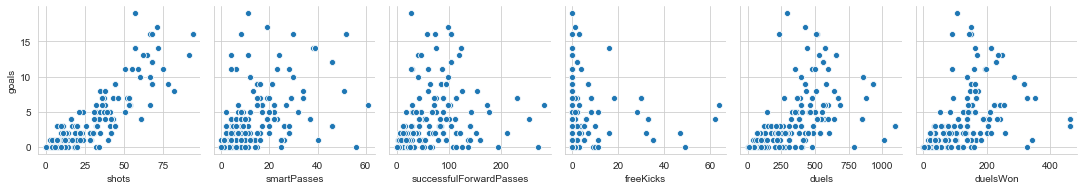

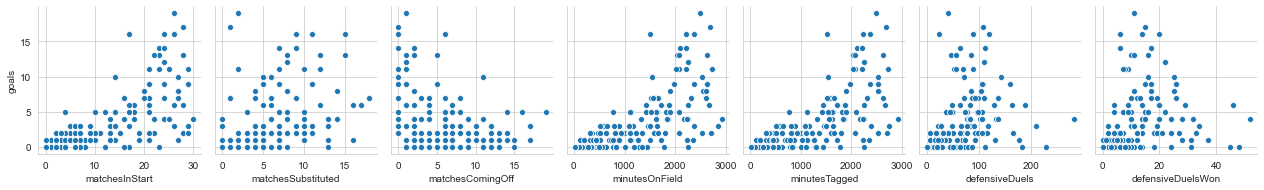

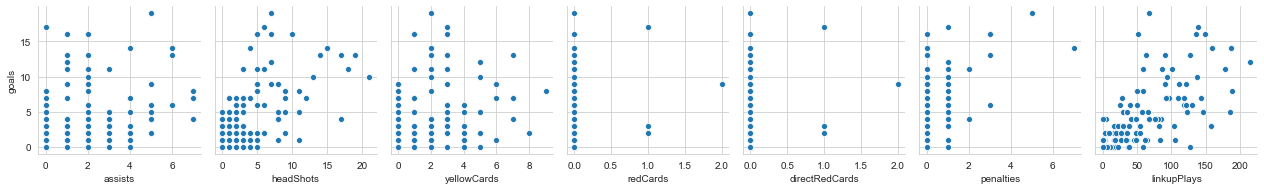

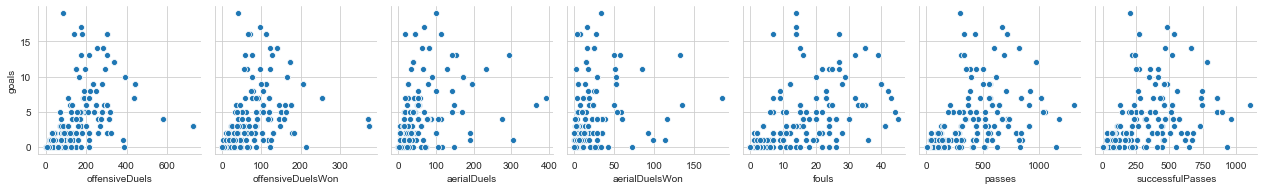

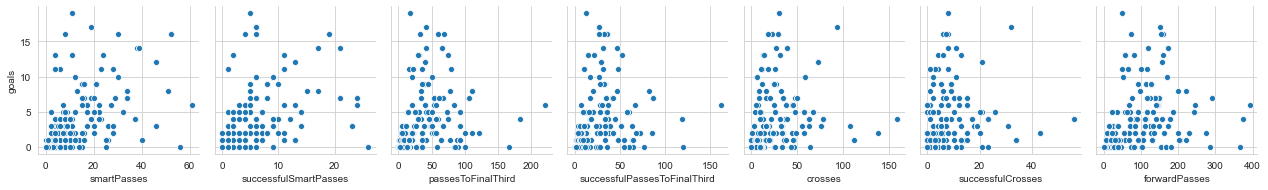

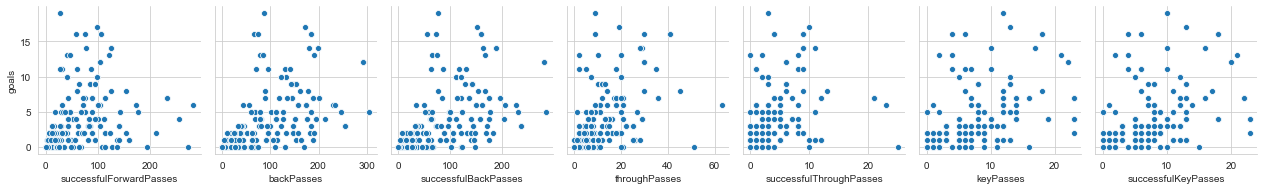

In [59]:
pp1 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['shots', 'smartPasses','successfulForwardPasses','freeKicks','duels','duelsWon'])
pp1

pp2 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['matchesInStart', 'matchesSubstituted', 'matchesComingOff','minutesOnField','minutesTagged','defensiveDuels','defensiveDuelsWon'])
pp2

pp3 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['assists', 'headShots', 'yellowCards','redCards','directRedCards','penalties','linkupPlays'])
pp3

pp4 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['offensiveDuels', 'offensiveDuelsWon', 'aerialDuels','aerialDuelsWon','fouls','passes','successfulPasses'])
pp4

pp5 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['smartPasses', 'successfulSmartPasses', 'passesToFinalThird','successfulPassesToFinalThird','crosses','successfulCrosses','forwardPasses'])
pp5

pp6 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['successfulForwardPasses', 'backPasses', 'successfulBackPasses','throughPasses','successfulThroughPasses','keyPasses','successfulKeyPasses'])
pp6

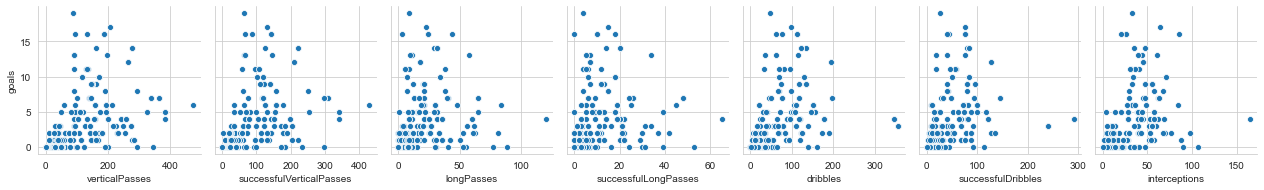

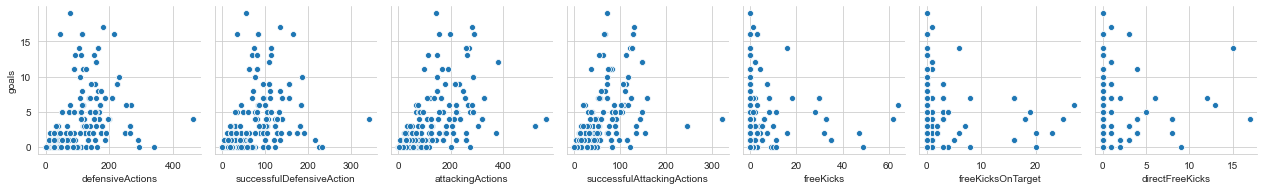

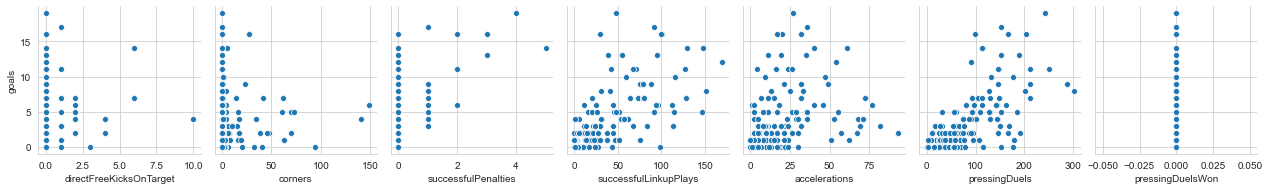

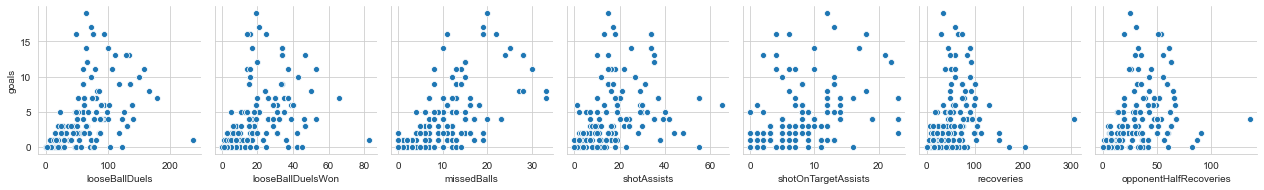

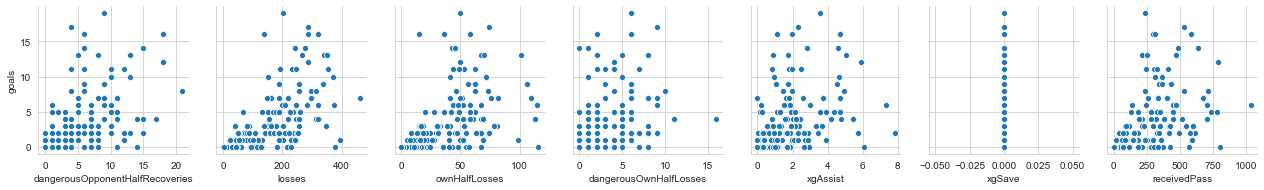

In [60]:
pp7 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['verticalPasses', 'successfulVerticalPasses', 'longPasses','successfulLongPasses','dribbles','successfulDribbles','interceptions'])
pp7

pp8 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['defensiveActions', 'successfulDefensiveAction', 'attackingActions','successfulAttackingActions','freeKicks','freeKicksOnTarget','directFreeKicks'])
pp8

pp9 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['directFreeKicksOnTarget', 'corners', 'successfulPenalties','successfulLinkupPlays','accelerations','pressingDuels','pressingDuelsWon'])
pp9

pp9 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['looseBallDuels', 'looseBallDuelsWon', 'missedBalls','shotAssists','shotOnTargetAssists','recoveries','opponentHalfRecoveries'])
pp9

pp10 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['dangerousOpponentHalfRecoveries', 'losses', 'ownHalfLosses','dangerousOwnHalfLosses','xgAssist','xgSave','receivedPass'])
pp10

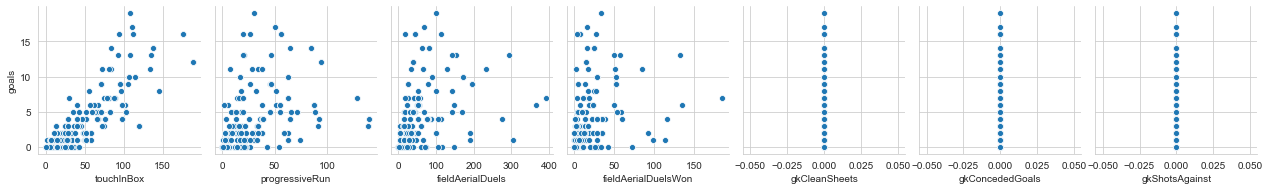

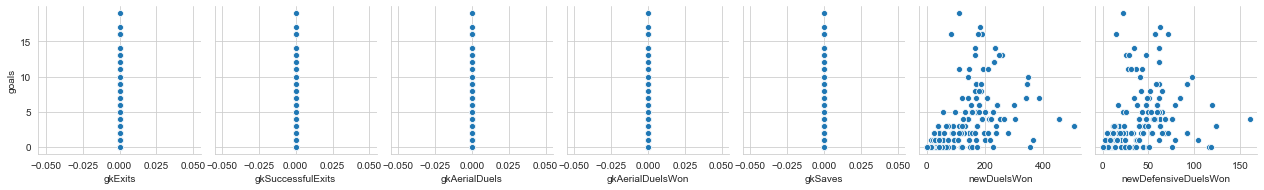

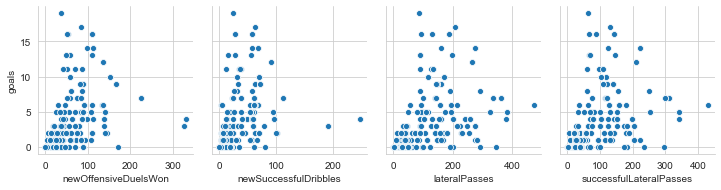

In [61]:
pp11 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['touchInBox', 'progressiveRun', 'fieldAerialDuels','fieldAerialDuelsWon','gkCleanSheets','gkConcededGoals','gkShotsAgainst'])
pp11

pp12 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['gkExits', 'gkSuccessfulExits', 'gkAerialDuels','gkAerialDuelsWon','gkSaves','newDuelsWon','newDefensiveDuelsWon'])
pp12

pp13 = sns.pairplot(data=goalVSrest_df,
                  y_vars=['goals'],
                  x_vars=['newOffensiveDuelsWon', 'newSuccessfulDribbles', 'lateralPasses','successfulLateralPasses'])
pp13

### Exclude unwanted columns from the df

In [62]:
goalVSrest_df_final = goalVSrest_df[goalVSrest_df.columns.difference(['playerId','competitionId','seasonId','xgSave'])]
goalVSrest_df_final.head(3)

,accelerations,aerialDuels,aerialDuelsWon,assists,attackingActions,backPasses,corners,crosses,dangerousOpponentHalfRecoveries,dangerousOwnHalfLosses,defensiveActions,defensiveDuels,defensiveDuelsWon,directFreeKicks,directFreeKicksOnTarget,directRedCards,dribbles,duels,duelsWon,fieldAerialDuels,fieldAerialDuelsWon,forwardPasses,fouls,freeKicks,freeKicksOnTarget,gkAerialDuels,gkAerialDuelsWon,gkCleanSheets,gkConcededGoals,gkExits,gkSaves,gkShotsAgainst,gkSuccessfulExits,goals,headShots,interceptions,keyPasses,lateralPasses,linkupPlays,longPasses,looseBallDuels,looseBallDuelsWon,losses,matches,matchesComingOff,matchesInStart,matchesSubstituted,minutesOnField,minutesTagged,missedBalls,newDefensiveDuelsWon,newDuelsWon,newOffensiveDuelsWon,newSuccessfulDribbles,offensiveDuels,offensiveDuelsWon,opponentHalfRecoveries,ownHalfLosses,passes,passesToFinalThird,penalties,pressingDuels,pressingDuelsWon,progressiveRun,receivedPass,recoveries,redCards,shotAssists,shotOnTargetAssists,shots,smartPasses,successfulAttackingActions,successfulBackPasses,successfulCrosses,successfulDefensiveAction,successfulDribbles,successfulForwardPasses,successfulKeyPasses,successfulLateralPasses,successfulLinkupPlays,successfulLongPasses,successfulPasses,successfulPassesToFinalThird,successfulPenalties,successfulSmartPasses,successfulThroughPasses,successfulVerticalPasses,throughPasses,touchInBox,verticalPasses,xgAssist,xgShot,yellowCards
0,11,59,14,4,121,90,0,16,5,6,107,71,12,2,1,0,49,388,137,59,14,76,32,2,1,0,0,0,0,0,0,0,0,7,9,29,12,101,97,21,74,35,188,22,6,16,9,1527,1527,16,34,142,59,22,184,76,20,51,366,34,0,130,0,14,260,48,0,19,12,37,19,52,84,6,70,29,42,12,76,64,6,277,17,0,6,4,76,17,74,101,2.57,7.72,6
1,36,68,16,0,282,172,0,93,4,9,181,108,15,1,1,1,99,423,150,68,16,152,14,1,1,0,0,0,0,0,0,0,0,17,6,64,13,207,139,23,73,21,287,28,0,28,1,2688,2688,19,63,183,83,62,174,98,31,74,674,42,1,153,0,50,533,59,1,17,13,71,19,130,152,32,136,75,98,13,131,92,15,485,27,1,6,10,131,19,111,207,2.34,10.94,3
2,35,45,13,5,276,185,61,57,7,4,106,78,16,5,2,0,156,502,210,45,13,115,10,11,3,0,0,0,0,0,0,0,0,5,0,28,12,193,123,15,59,31,226,25,7,18,8,1813,1813,12,50,201,107,61,320,150,43,62,625,42,1,61,0,71,449,69,0,30,12,41,22,105,176,21,78,100,75,11,153,91,9,511,28,1,7,4,153,20,64,193,4.70,4.11,3


In [103]:
goalVSrest_df_final.to_csv('ToFindPval_df_V02.csv')

In [63]:
nameCols = goalVSrest_df_final.columns.values
# nameCols
for i in nameCols:
    ccm = np.corrcoef(goalVSrest_df_final.goals, goalVSrest_df_final[i])
#     print(i)
    print(i,ccm[0][1])

accelerations 0.37349651175180104
aerialDuels 0.4239312371415708
aerialDuelsWon 0.3255947816430298
assists 0.38823578668840264
attackingActions 0.5066631542725066
backPasses 0.5284267646988595
corners 0.0504778413801453
crosses 0.24076394478782193
dangerousOpponentHalfRecoveries 0.5934743965997086
dangerousOwnHalfLosses 0.34470280515799484
defensiveActions 0.38698543347460723
defensiveDuels 0.37573150695514923
defensiveDuelsWon 0.2871867022779931
directFreeKicks 0.1601671423987739
directFreeKicksOnTarget 0.11701143944095299
directRedCards 0.15277525869523093
dribbles 0.37505870973617583
duels 0.544566143511034
duelsWon 0.46782251542529285
fieldAerialDuels 0.4239312371415708
fieldAerialDuelsWon 0.3255947816430298
forwardPasses 0.35990656772328317
fouls 0.49947465938976937
freeKicks 0.028726331762907027
freeKicksOnTarget 0.021415643861256536
gkAerialDuels nan
gkAerialDuelsWon nan
gkCleanSheets nan
gkConcededGoals nan
gkExits nan
gkSaves nan
gkShotsAgainst nan
gkSuccessfulExits nan
goals 

C:\Users\mahav\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\mahav\AppData\Roaming\Python\Python38\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [64]:
goalVSrest_df.describe()

,competitionId,playerId,seasonId,matches,matchesInStart,matchesSubstituted,matchesComingOff,minutesOnField,minutesTagged,goals,assists,shots,headShots,yellowCards,redCards,directRedCards,penalties,linkupPlays,duels,duelsWon,defensiveDuels,defensiveDuelsWon,offensiveDuels,offensiveDuelsWon,aerialDuels,aerialDuelsWon,fouls,passes,successfulPasses,smartPasses,successfulSmartPasses,passesToFinalThird,successfulPassesToFinalThird,crosses,successfulCrosses,forwardPasses,successfulForwardPasses,backPasses,successfulBackPasses,throughPasses,successfulThroughPasses,keyPasses,successfulKeyPasses,verticalPasses,successfulVerticalPasses,longPasses,successfulLongPasses,dribbles,successfulDribbles,interceptions,defensiveActions,successfulDefensiveAction,attackingActions,successfulAttackingActions,freeKicks,freeKicksOnTarget,directFreeKicks,directFreeKicksOnTarget,corners,successfulPenalties,successfulLinkupPlays,accelerations,pressingDuels,pressingDuelsWon,looseBallDuels,looseBallDuelsWon,missedBalls,shotAssists,shotOnTargetAssists,recoveries,opponentHalfRecoveries,dangerousOpponentHalfRecoveries,losses,ownHalfLosses,dangerousOwnHalfLosses,xgShot,xgAssist,xgSave,receivedPass,touchInBox,progressiveRun,fieldAerialDuels,fieldAerialDuelsWon,gkCleanSheets,gkConcededGoals,gkShotsAgainst,gkExits,gkSuccessfulExits,gkAerialDuels,gkAerialDuelsWon,gkSaves,newDuelsWon,newDefensiveDuelsWon,newOffensiveDuelsWon,newSuccessfulDribbles,lateralPasses,successfulLateralPasses
count,213.0,213.000000,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.0,213.000000,213.000000,213.000000,213.00000,213.000000,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,364.0,165536.990610,185727.0,18.619718,12.985915,5.962441,5.633803,1267.624413,1262.267606,3.600939,1.661972,27.549296,3.032864,1.769953,0.056338,0.037559,0.309859,51.774648,328.600939,121.929577,68.206573,12.136150,156.591549,75.741784,49.72770,16.671362,14.633803,387.859155,305.051643,13.018779,5.488263,36.126761,24.906103,27.201878,8.150235,90.624413,62.244131,93.981221,86.286385,10.779343,3.619718,6.746479,6.600939,118.967136,93.295775,19.934272,10.647887,68.530516,47.103286,31.591549,103.605634,74.164319,136.300469,59.990610,3.647887,1.643192,0.943662,0.314554,9.154930,0.220657,38.798122,21.267606,81.450704,0.0,54.075117,17.380282,9.248826,14.807512,6.746479,50.239437,28.812207,5.525822,155.502347,38.131455,2.976526,3.768779,1.766103,0.0,272.948357,46.929577,30.262911,49.72770,16.671362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.103286,38.765258,62.286385,35.347418,118.967136,93.295775
std,0.0,164187.285161,0.0,8.468643,9.318514,4.572116,4.296464,833.118403,828.729944,4.099632,1.867879,22.223854,4.270771,1.902986,0.268855,0.234918,0.822873,52.545451,243.795587,99.236423,51.450696,10.258694,134.954875,72.423505,62.78731,25.418849,11.250458,297.591414,242.582571,13.022101,5.833872,33.690011,24.133094,28.062457,9.094160,76.745105,55.321927,72.015588,67.444650,10.658646,4.163066,5.862541,5.672293,97.930394,81.397359,19.654694,11.325083,67.472393,48.993922,24.654735,77.260124,56.227270,114.443748,54.683307,9.815898,4.656545,2.487065,1.098723,21.635258,0.668105,40.763834,21.609500,65.044279,0.0,41.92

In [65]:
# goalVSrest_df.columns

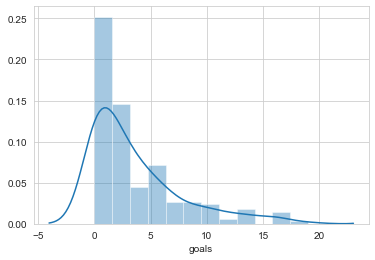

In [66]:
sns.distplot(goalVSrest_df['goals'])  # To see how the 'goals' column values are distributed

#### Considering Corr-Coeff values > = 0.5, consider the columns (27) that are highly correlated with Goal

In [97]:
df=goalVSrest_df[['ownHalfLosses','attackingActions','receivedPass','successfulBackPasses','successfulKeyPasses','smartPasses','keyPasses','shotOnTargetAssists','backPasses',
'duels','successfulPenalties','looseBallDuels','penalties','matches','dangerousOpponentHalfRecoveries','losses','headShots','missedBalls','minutesOnField',
'minutesTagged','pressingDuels','matchesInStart','successfulLinkupPlays','linkupPlays','touchInBox','shots','xgShot','goals']]
df.head(3) # 213 rows × 28 columns

,ownHalfLosses,attackingActions,receivedPass,successfulBackPasses,successfulKeyPasses,smartPasses,keyPasses,shotOnTargetAssists,backPasses,duels,successfulPenalties,looseBallDuels,penalties,matches,dangerousOpponentHalfRecoveries,losses,headShots,missedBalls,minutesOnField,minutesTagged,pressingDuels,matchesInStart,successfulLinkupPlays,linkupPlays,touchInBox,shots,xgShot,goals
0,51,121,260,84,12,19,12,12,90,388,0,74,0,22,5,188,9,16,1527,1527,130,16,64,97,74,37,7.72,7
1,74,282,533,152,13,19,13,13,172,423,1,73,1,28,4,287,6,19,2688,2688,153,28,92,139,111,71,10.94,17
2,62,276,449,176,11,22,12,12,185,502,1,59,1,25,7,226,0,12,1813,1813,61,18,91,123,64,41,4.11,5


In [100]:
df.to_csv('ToFindPval_df.csv')

### To calculate the correlation matrix and represent it in the form of HeatMap

In [98]:
df.corr()

,ownHalfLosses,attackingActions,receivedPass,successfulBackPasses,successfulKeyPasses,smartPasses,keyPasses,shotOnTargetAssists,backPasses,duels,successfulPenalties,looseBallDuels,penalties,matches,dangerousOpponentHalfRecoveries,losses,headShots,missedBalls,minutesOnField,minutesTagged,pressingDuels,matchesInStart,successfulLinkupPlays,linkupPlays,touchInBox,shots,xgShot,goals
ownHalfLosses,1.000000,0.702413,0.731952,0.740023,0.617786,0.577945,0.611596,0.611596,0.757399,0.881375,0.198594,0.808534,0.204720,0.845185,0.665488,0.911362,0.448800,0.696630,0.905239,0.903675,0.790427,0.899546,0.551158,0.581225,0.600930,0.679499,0.518934,0.500671
attackingActions,0.702413,1.000000,0.789524,0.834139,0.851818,0.754461,0.847570,0.847570,0.843229,0.808512,0.209189,0.575101,0.222703,0.759891,0.741738,0.775602,0.232884,0.506984,0.825884,0.825173,0.571769,0.806655,0.708490,0.723380,0.763447,0.730599,0.496254,0.506663
receivedPass,0.731952,0.789524,1.000000,0.952354,0.792198,0.848281,0.791596,0.791596,0.953199,0.666574,0.214301,0.525347,0.247916,0.764952,0.759691,0.750588,0.215349,0.546957,0.823156,0.825921,0.568486,0.813717,0.737818,0.723281,0.714348,0.725546,0.512673,0.512200
successfulBackPasses,0.740023,0.834139,0.952354,1.000000,0.794059,0.793615,0.795003,0.795003,0.998345,0.720313,0.223762,0.565710,0.255158,0.780714,0.731314,0.758334,0.233982,0.541049,0.831116,0.832211,0.599984,0.820962,0.791867,0.781079,0.753410,0.734896,0.532609,0.518382
successfulKeyPasses,0.617786,0.851818,0.792198,0.794059,1.000000,0.749044,0.998240,0.998240,0.800957,0.664266,0.267304,0.504719,0.269157,0.701182,0.726497,0.708424,0.251921,0.523918,0.754344,0.757016,0.549881,0.745135,0.678909,0.682350,0.735910,0.699527,0.455842,0.519092
smartPasses,0.577945,0.754461,0.848281,0.793615,0.749044,1.000000,0.752937,0.752937,0.800041,0.643801,0.235909,0.513994,0.242005,0.637895,0.735727,0.696045,0.236031,0.518304,0.717388,0.717986,0.523789,0.712098,0.718603,0.724368,0.709190,0.687966,0.496648,0.522239
keyPasses,0.611596,0.847570,0.791596,0.795003,0.998240,0.752937,1.000000,1.000000,0.801551,0.659994,0.273274,0.503727,0.275475,0.696935,0.732160,0.705397,0.255988,0.522148,0.751392,0.754165,0.550765,0.742837,0.687042,0.690096,0.742707,0.702096,0.464203,0.526460
shotOnTargetAssists,0.611596,0.847570,0.791596,0.795003,0.998240,0.752937,1.000000,1.000000,0.801551,0.659994,0.273274,0.503727,0.275475,0.696935,0.732160,0.705397,0.255988,0.522148,0.751392,0.754165,0.550765,0.742837,0.687042,0.690096,0.742707,0.702096,0.464203,0.526460
backPasses,0.757399,0.843229,0.953199,0.998345,0.800957,0.800041,0.801551,0.801551,1.000000,0.738999,0.239299,0.587684,0.265162,0.795992,0.741536,0.779798,0.249913,0.561687,0.848465,0.849550,0.621528,0.838519,0.790027,0.783201,0.763903,0.748675,0.541387,0.528427
duels,0.881375,0.808512,0.666574,0.720313,0.664266,0.643801,0.659994,0.659994,0.738999,1.000000,0.182468,0.916329,0.193707,0.823828,0.696936,0.949780,0.529620,0.699855,0.896308,0.892284,0.796704,0.883545,0.621191,0.664389,0.723601,0.724528,0.600236,0.544566


(<Figure size 1224x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2008610d520>)

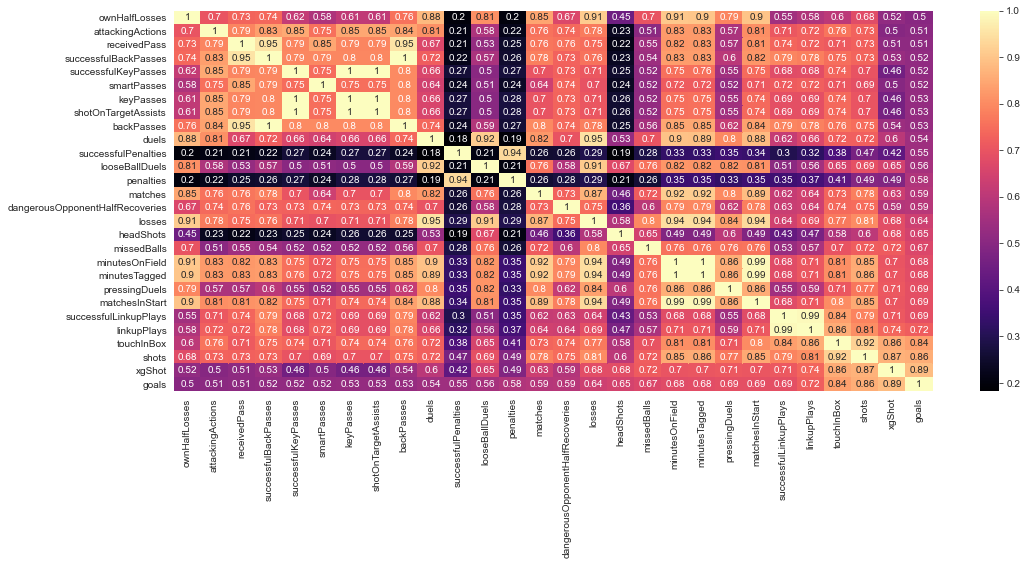

In [99]:
plt.subplots(figsize=(17,7))
sns.heatmap(df.corr(),annot=True,cmap='magma')

In [ ]:
forward_details_df1.to_csv('forward_details_df1.csv')

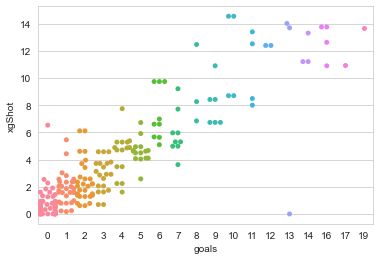

In [76]:
sns.swarmplot(x="goals", y="xgShot", data=df)

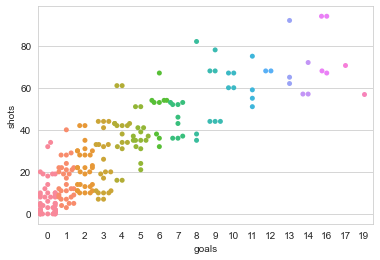

In [75]:
sns.swarmplot(x="goals", y="shots", data=df)

In [121]:
fig = px.scatter(df, x="goals", y="shots", width=600, height=300, trendline="ols")
fig.show()
fig = px.scatter(df, x="goals", y="shots", width=600, height=300)
fig.show()